In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import time

# --- 1. Load Data ---
# Use the preprocessed data with route averages, as it's cleaner for this task.
try:
    df = pd.read_csv('MarketFarePredictionData.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'MarketFarePredictionData.csv' not found. Please run the preprocessing script first.")
    exit()

# --- 2. Define Features and Target ---
# These are the features your model will use to find "similar" flights.
features = ['NonStopMiles', 'MktMilesFlown', 'Market_HHI', 'Market_share', 'MktCoupons']
target = 'Average_Fare'

X = df[features]
y = df[target]

# --- 3. Split Data into Training and Testing Sets ---
# We'll train the model on 80% of the data and test its performance on the remaining 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Scale the Features (CRITICAL STEP) ---
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data to learn the mean and standard deviation
scaler.fit(X_train)

# Transform both the training and testing data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nData prepared: {len(X_train)} training samples, {len(X_test)} testing samples.")

# --- 5. Initialize and Train the KNN Model ---
# We'll start with a common choice for k, like k=5.
# The best k should be found using cross-validation (see Step 4 in the guide).
knn_model = KNeighborsRegressor(n_neighbors=5)

# "Training" in KNN is just memorizing the data.
start_train_time = time.time()
knn_model.fit(X_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

print(f"\nKNN model initialized with k=5.")

# --- 6. Make Predictions ---
start_pred_time = time.time()
y_pred = knn_model.predict(X_test_scaled)
end_pred_time = time.time()
prediction_time_total = end_pred_time - start_pred_time

# --- 7. Evaluate the Model ---
# Accuracy Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Performance Metrics
# Calculate prediction time per 1000 rows for easier comparison
num_test_rows = len(X_test)
prediction_time_per_1k = (prediction_time_total / num_test_rows) * 1000

print("\n--- Model Performance ---")
print("Accuracy Metrics:")
print(f"  - Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"  - Mean Absolute Error (MAE):      ${mae:.2f}")
print(f"  - R-squared (R²):                 {r2:.3f}")
print("\nEfficiency Metrics:")
print(f"  - Training Time:                  {training_time:.6f} seconds")
print(f"  - Prediction Time (per 1k rows):  {prediction_time_per_1k:.6f} ms")
print("-------------------------")

Dataset loaded successfully.

Data prepared: 1265022 training samples, 316256 testing samples.

KNN model initialized with k=5.

--- Model Performance ---
Accuracy Metrics:
  - Root Mean Squared Error (RMSE): $5.48
  - Mean Absolute Error (MAE):      $0.37
  - R-squared (R²):                 0.994

Efficiency Metrics:
  - Training Time:                  0.454421 seconds
  - Prediction Time (per 1k rows):  0.012222 ms
-------------------------


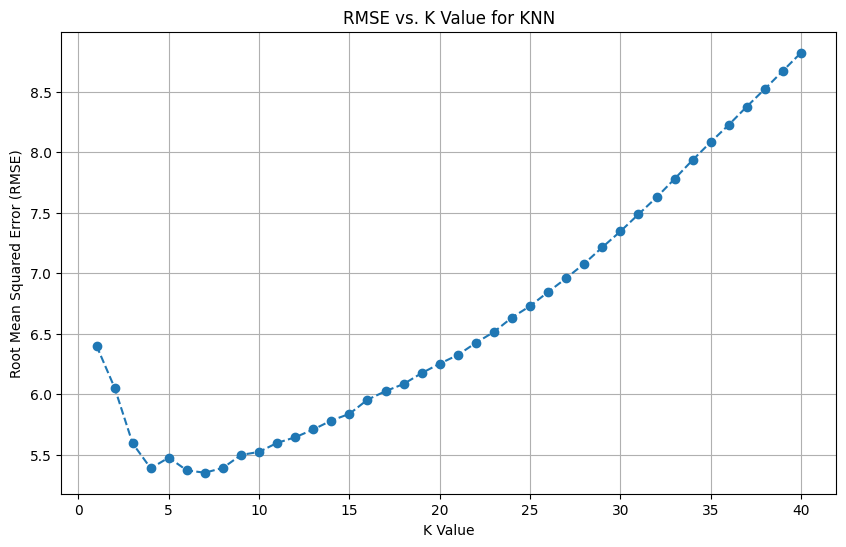

In [3]:
import matplotlib.pyplot as plt

# Test k values from 1 to 40
k_range = range(1, 41)
rmse_values = []

for k in k_range:
    # Initialize and train a new model for each k
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    
    # Make predictions and calculate error
    y_pred = model.predict(X_test_scaled)
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(error)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, rmse_values, marker='o', linestyle='--')
plt.title('RMSE vs. K Value for KNN')
plt.xlabel('K Value')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.show()